In [2]:
%pip install pandas
%pip install openpyxl
%pip install matplotlib
%pip install WordCloud

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Jika pada hasil prespossing ada emoticon maka menggunakan proses bawah ini

In [3]:
import pandas as pd

data = pd.read_excel('hasil/hasil_preposesing.xlsx')
final = pd.DataFrame()
final['text'] = data['text']
final['rating'] = data['rating']
final['polarity_emoticon'] = data['polarity_emotion']
final['polarity_text'] = data['polarity_text']
final['text_join'] = data['text_join']
final.head()

C:\Users\halim\AppData\Local\Temp\ipykernel_8476\921797510.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,text,rating,polarity_emoticon,polarity_text,text_join
0,Aplikasinya bagus semua nya bagus tapi tolong ...,5,1,-16,aplikasi bagus nya bagus tolong tambah teman a...
1,Lewat aplikasi ruang guru saya bisa tau pembel...,5,0,-6,aplikasi ruang guru ajar pembelajaranya erti
2,Seru isinya bisa ngerjain tugas dr aplikasi at...,5,0,-5,seru isi tugas aplikasi guru ngajar
3,Baik,5,0,0,NaN
4,Jgn di dwnld Nanti bayar,3,0,-2,dwnld bayar


jika mengetahui positif, negatif dan netral

In [ ]:
# Function to determine sentiment polarity of tweets
def sentiment_analysis(polarity):
    senntimen = ''
    if polarity > 0:
        senntimen = 'positif'
    elif polarity < 0:
        senntimen = 'negatif'
    else:
        senntimen = 'netral'
    return pd.Series([polarity, senntimen], index=['polarity', 'sentimen'])

final['polarity'] = final['polarity_text'].astype(int) + final['polarity_emoticon'].astype(int)
final[['polarity', 'sentimen']] = final['polarity'].apply(sentiment_analysis)
final = final.dropna()

# Hitung jumlah kategori sentimen
sentiment_counts = final['sentimen'].value_counts()
total_data = len(final)
sentiment_percentages = (sentiment_counts / total_data) * 100
sentiment_percentages_rounded = sentiment_percentages.round(2)  # Bundel nilai bulat
final_summary = pd.DataFrame({'jumlah': sentiment_counts, 'persentase (%)': sentiment_percentages_rounded})
final_summary.loc['total'] = final_summary.sum()
print("Summary Sentiment Analysis:")
print(final_summary)
print("\nTotal data:", total_data)

final.to_excel('hasil/klasifikasi_sentimen.xlsx', index=False)


In [ ]:
import matplotlib.pyplot as plt

chart_value = final['sentimen'].value_counts().values
chart_index = final['sentimen'].value_counts().index

colors = plt.cm.viridis_r(chart_value / float(max(chart_value)))  # Menggunakan colormap viridis_r
plt.bar(chart_index, chart_value, color=colors, alpha=0.7)

plt.title('Analisis Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Sentimen')
plt.grid(color='#a83289', linestyle='--', linewidth=1, axis='y', alpha=0.25)
plt.show()


jika mengetahui lebih detail pesarasan 

In [4]:
# Fungsi untuk menentukan polaritas sentimen dari teks
def sentiment_analysis(polarity):
    kategori_sentimen = ''
    if polarity > 8:
        kategori_sentimen = 'sangat senang'
    elif polarity > 6:
        kategori_sentimen = 'sangat bahagia'
    elif polarity > 4:
        kategori_sentimen = 'bahagia'
    elif polarity > 2:
        kategori_sentimen = 'puas'
    elif polarity > 1:
        kategori_sentimen = 'netral'
    elif polarity > -4:
        kategori_sentimen = 'sedih'
    elif polarity > -6:
        kategori_sentimen = 'sangat sedih'
    elif polarity > -8:
        kategori_sentimen = 'sangat marah'
    else:
        kategori_sentimen = 'marah'
    return pd.Series([polarity, kategori_sentimen], index=['polarity', 'sentimen']) 

final['polarity'] = final['polarity_text'].astype(int) + final['polarity_emoticon'].astype(int)
final[['polarity', 'sentimen']] = final['polarity'].apply(sentiment_analysis)
final = final.dropna()

# Hitung jumlah kategori sentimen
sentiment_counts = final['sentimen'].value_counts()
total_data = len(final)
sentiment_percentages = (sentiment_counts / total_data) * 100
sentiment_percentages_rounded = sentiment_percentages.round(2)  # Bundel nilai bulat
final_summary = pd.DataFrame({'jumlah': sentiment_counts, 'persentase (%)': sentiment_percentages_rounded})
final_summary.loc['total'] = final_summary.sum()
print("Summary Sentiment Analysis:")
print(final_summary)
print("\nTotal data:", total_data)

final.to_excel('hasil/klasifikasi_sentimen_perasaan.xlsx', index=False)


Summary Sentiment Analysis:
                 jumlah  persentase (%)
sentimen                               
sedih            6643.0           49.40
sangat sedih     1221.0            9.08
bahagia          1107.0            8.23
puas             1104.0            8.21
marah            1035.0            7.70
sangat marah      815.0            6.06
netral            699.0            5.20
sangat senang     514.0            3.82
sangat bahagia    310.0            2.31
total           13448.0          100.01

Total data: 13448


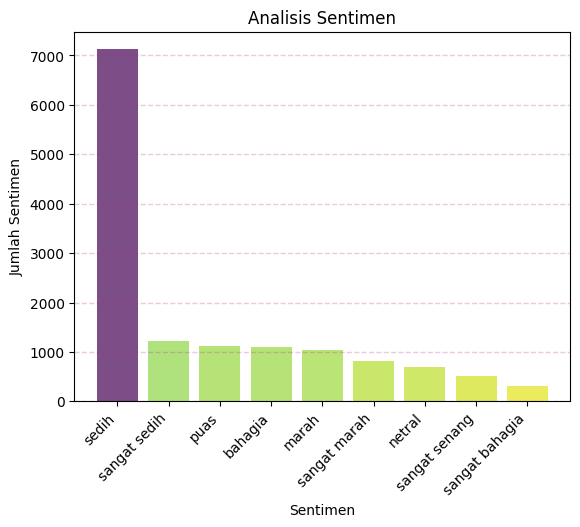

In [4]:
import matplotlib.pyplot as plt

chart_value = final['sentimen'].value_counts().values
chart_index = final['sentimen'].value_counts().index

colors = plt.cm.viridis_r(chart_value / float(max(chart_value)))  # Menggunakan colormap viridis_r
plt.bar(chart_index, chart_value, color=colors, alpha=0.7)

plt.title('Analisis Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Sentimen')
plt.grid(color='#a83289', linestyle='--', linewidth=1, axis='y', alpha=0.25)

# Rotasi label sumbu x
plt.xticks(rotation=45, ha='right')  # Rotasi 45 derajat dan penempatan ke kanan

plt.show()


# Jika pada hasil prespossing tanpe emoticon maka menggunakan proses bawah ini

In [ ]:
import pandas as pd

data = pd.read_excel('hasil/hasil_preposesing.xlsx')
final = pd.DataFrame()
final['text'] = data['text']
final['rating'] = data['rating']
final['polarity_text'] = data['polarity_text']
final['text_join'] = data['text_join']
final.head()

jika mengetahui positif, negatif dan netral

In [ ]:
# Function to determine sentiment polarity of tweets
def sentiment_analysis(polarity):
    senntimen = ''
    if polarity > 0:
        senntimen = 'positif'
    elif polarity < 0:
        senntimen = 'negatif'
    else:
        senntimen = 'netral'
    return pd.Series([polarity, senntimen], index=['polarity_text', 'sentimen'])

final[['polarity_text', 'sentimen']] = final['polarity_text'].apply(sentiment_analysis)
final = final.dropna()

# Hitung jumlah kategori sentimen
sentiment_counts = final['sentimen'].value_counts()
total_data = len(final)
sentiment_percentages = (sentiment_counts / total_data) * 100
sentiment_percentages_rounded = sentiment_percentages.round(2)  # Bundel nilai bulat
final_summary = pd.DataFrame({'jumlah': sentiment_counts, 'persentase (%)': sentiment_percentages_rounded})
final_summary.loc['total'] = final_summary.sum()
print("Summary Sentiment Analysis:")
print(final_summary)
print("\nTotal data:", total_data)

final.to_excel('hasil/klasifikasi_sentimen.xlsx', index=False)


In [ ]:
import matplotlib.pyplot as plt

chart_value = final['sentimen'].value_counts().values
chart_index = final['sentimen'].value_counts().index

colors = plt.cm.viridis_r(chart_value / float(max(chart_value)))  # Menggunakan colormap viridis_r
plt.bar(chart_index, chart_value, color=colors, alpha=0.7)

plt.title('Analisis Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Sentimen')
plt.grid(color='#a83289', linestyle='--', linewidth=1, axis='y', alpha=0.25)
plt.show()


jika mengetahui lebih detail pesarasan 

In [ ]:
# Fungsi untuk menentukan polaritas sentimen dari teks
def sentiment_analysis(polarity):
    kategori_sentimen = ''
    if polarity > 8:
        kategori_sentimen = 'sangat senang'
    elif polarity > 6:
        kategori_sentimen = 'sangat bahagia'
    elif polarity > 4:
        kategori_sentimen = 'bahagia'
    elif polarity > 2:
        kategori_sentimen = 'puas'
    elif polarity > 1:
        kategori_sentimen = 'netral'
    elif polarity > -4:
        kategori_sentimen = 'sedih'
    elif polarity > -6:
        kategori_sentimen = 'sangat sedih'
    elif polarity > -8:
        kategori_sentimen = 'sangat marah'
    else:
        kategori_sentimen = 'marah'
    return pd.Series([polarity, kategori_sentimen], index=['polarity_text', 'sentimen'])

final[['polarity_text', 'sentimen']] = final['polarity_text'].apply(sentiment_analysis)
final = final.dropna()

# Hitung jumlah kategori sentimen
sentiment_counts = final['sentimen'].value_counts()
total_data = len(final)
sentiment_percentages = (sentiment_counts / total_data) * 100
sentiment_percentages_rounded = sentiment_percentages.round(2)  # Bundel nilai bulat
final_summary = pd.DataFrame({'jumlah': sentiment_counts, 'persentase (%)': sentiment_percentages_rounded})
final_summary.loc['total'] = final_summary.sum()
print("Summary Sentiment Analysis:")
print(final_summary)
print("\nTotal data:", total_data)

final.to_excel('hasil/klasifikasi_sentimen_perasaan.xlsx', index=False)


In [ ]:
import matplotlib.pyplot as plt

chart_value = final['sentimen'].value_counts().values
chart_index = final['sentimen'].value_counts().index

colors = plt.cm.viridis_r(chart_value / float(max(chart_value)))  # Menggunakan colormap viridis_r
plt.bar(chart_index, chart_value, color=colors, alpha=0.7)

plt.title('Analisis Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Sentimen')
plt.grid(color='#a83289', linestyle='--', linewidth=1, axis='y', alpha=0.25)

# Rotasi label sumbu x
plt.xticks(rotation=45, ha='right')  # Rotasi 45 derajat dan penempatan ke kanan

plt.show()
